In [1]:
import sys
base_dir = "D:/Thesis/Cobra/cobra/"
if base_dir not in sys.path:
    sys.path.append(base_dir)
from os.path import join
import pandas as pd
from utilities import utils
from stats_tools import vis as svis
from datetime import datetime as dt
import numpy as np

In [2]:
table_dir = join(base_dir, 'data/tables')
df = utils.load_scan_csv(join(table_dir, 'neg_pos.csv'))
D_k = 'InstanceCreationDate'
T_k = 'InstanceCreationTime'
def convert_to_date(x):
    try:
        return dt.strptime(x, "%Y-%m-%d").date()
    except:
        return pd.NaT
def convert_to_time(x):
    try:
        return dt.strptime(x, "%H:%M:%S").time()
    except:
        return pd.NaT
df.InstanceCreationDate = df.InstanceCreationDate.map(lambda x: convert_to_date(x))
df.InstanceCreationTime = df.InstanceCreationTime.map(lambda x: convert_to_time(x))

C:\Users\klein\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  


In [3]:
df_n = df[df.Pos==0]

In [15]:
print("negative entries: ",len(df))
print("date not given: ", df.InstanceCreationDate.isnull().sum())

negative entries:  328489
date not given:  54325


# Check if scans from same study can have different dates

## Plot difference in days distribution for each study

In [5]:
study_date_count = df_n.dropna(subset=['InstanceCreationDate']).groupby('StudyInstanceUID')['InstanceCreationDate'].nunique()
mask_diff_days = study_date_count[study_date_count>1]
df_different_dates = df_n[df_n.StudyInstanceUID.isin(mask_diff_days.index)]
df_different_dates = df_different_dates.dropna(subset=['InstanceCreationDate'])
gb_sid = df_different_dates.groupby('StudyInstanceUID')
first_day = gb_sid['InstanceCreationDate'].min()

In [6]:
differences = []
for index, row in df_different_dates.iterrows():
    differences.append((row['InstanceCreationDate'] - first_day[row['StudyInstanceUID']]).days)
differences = np.array(differences)

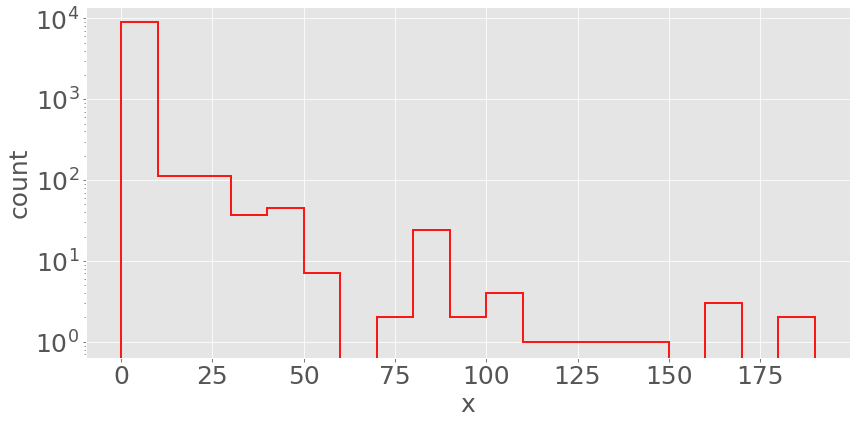

In [17]:
_ = svis.hist(differences, np.arange(0,200,10), kwargs={'ylogscale':True})

## -> because of the date differences within a study folder, we cannot replace missing values by the other dates in the study

In [30]:
study_date_count = df.groupby('StudyInstanceUID')['InstanceCreationDate'].nunique()
not_unique = study_date_count[study_date_count==4]
#len(df.groupby('StudyInstanceUID')['InstanceCreationDate'].nunique())
#print(df.groupby('StudyInstanceUID')['InstanceCreationDate'].nunique().sum())
index5 = not_unique.index[0]
df[df.StudyInstanceUID==index5].InstanceCreationDate

193585           NaN
193586    2019-05-29
193587    2019-05-29
193588    2019-05-29
193589           NaN
193590    2020-11-04
193591    2019-05-29
193592    2019-05-29
193593           NaN
193594    2019-05-29
193595    2019-05-29
193596    2019-05-29
193597    2019-06-04
193598           NaN
193599    2019-05-29
193600    2019-06-05
193601    2019-05-29
193602    2019-05-29
193603    2019-05-29
193604    2019-05-29
193605    2019-05-29
193606    2019-05-29
193607    2019-06-05
193608    2019-05-29
Name: InstanceCreationDate, dtype: object

In [5]:
D_k = 'InstanceCreationDate'
T_k = 'InstanceCreationTime'
def convert_to_date(x):
    try:
        return dt.strptime(x, "%Y-%m-%d").date()
    except:
        return pd.NaT
def convert_to_time(x):
    try:
        return dt.strptime(x, "%H:%M:%S").time()
    except:
        return pd.NaT
df.InstanceCreationDate = df.InstanceCreationDate.map(lambda x: convert_to_date(x))
df.InstanceCreationTime = df.InstanceCreationTime.map(lambda x: convert_to_time(x))

In [6]:
df_n = df[df.Pos==0]

In [7]:
df_n.InstanceCreationDate

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
315922   NaT
315923   NaT
315924   NaT
315925   NaT
315926   NaT
Name: InstanceCreationDate, Length: 314430, dtype: datetime64[ns]

In [8]:
df_n.InstanceCreationTime

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
315922   NaT
315923   NaT
315924   NaT
315925   NaT
315926   NaT
Name: InstanceCreationTime, Length: 314430, dtype: datetime64[ns]

In [95]:
def combine_date_time(a, b):
    try:
        return dt.combine(a, b)
    except:
        return pd.NaT
    
s = df.apply(lambda x: combine_date_time(a = x[D_k], b = x[T_k]), axis=1).values

numpy.datetime64('2019-10-17T11:31:44.000000000')

In [3]:
dt.combine(df[df.Pos==0].InstanceCreationDate[0], df[df.Pos==0].InstanceCreationTime[0])

TypeError: combine() argument 1 must be datetime.date, not str

In [88]:
df[df.Pos==0].InstanceCreationDate

0         2019-10-17
1         2019-10-17
2                NaT
3                NaT
4                NaT
             ...    
315922    2019-09-20
315923           NaT
315924           NaT
315925    2019-09-20
315926    2019-09-20
Name: InstanceCreationDate, Length: 314430, dtype: object

In [92]:
df[df.Pos==0].DateTime

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
315922   NaT
315923   NaT
315924   NaT
315925   NaT
315926   NaT
Name: DateTime, Length: 314430, dtype: datetime64[ns]

In [28]:
dt.strptime(df_n.InstanceCreationDate[0], "%Y-%m-%d").date()

datetime.date(2019, 10, 17)

In [17]:
datetime.datetime.combine(datetime.date(2011, 1, 1), 
                          datetime.time(10, 23))

nan